Selecting variables

In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
from matplotlib import pyplot as plt
import pandas as pd
from bsmcalls import individuals
from bsmcalls import preprocessing
import fwsel
import statsmodels as sm
%matplotlib inline

In [2]:
calls, clin = individuals.get_data(merge=False, cleancalls=True)

The `cleancalls` argument in `bsmcalls.individuals.get_data` takes care of redundant and degenerate variables.

Below `bsmcalls.preprocessing.preprocess` performs

* imputation or removing a variable if the fraction of missing values exceeds 10%
* prettifying the variable names (replace whitespace and `./\:` characters with `_`)
* turns *Dx* into a response variable by dummifying it so it takes values on $\{0, 1\}$
* standardizes numeric variables

In [3]:
calls1 = preprocessing.preprocess(calls)
clin1 = preprocessing.preprocess(clin)
calls1 = individuals.merge_data(calls1, clin1[['Dx']])

In [4]:
calls1.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3301 entries, ('CMC_MSSM_027', 'NeuN_pl', '1', 11973569, 'C->T') to ('CMC_PITT_118', 'NeuN_pl', 'X', 120533592, 'C->A')
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   REF                   3301 non-null   category
 1   ALT                   3301 non-null   category
 2   FILTER_PASS           3301 non-null   category
 3   AF                    3301 non-null   float64 
 4   BaseQRankSum          3301 non-null   float64 
 5   DP                    3301 non-null   float64 
 6   FS                    3301 non-null   float64 
 7   SOR                   3301 non-null   float64 
 8   VQSLOD                3301 non-null   float64 
 9   culprit               3301 non-null   category
 10  ChromatinState_DLPFC  3301 non-null   category
 11  szdbCNVcount          3301 non-null   float64 
 12  GWASpval              3301 non-null   float64 
 13  evolConstrai

## Forward variable selection

In [5]:
best1 = fwsel.forward_selected(calls1, 'Dx')

In [6]:
best1.model.formula

'Dx ~ culprit + DP + ALT + AF + FILTER_PASS + VQSLOD + BaseQRankSum + SOR + REF + GWASpval + 1'

In [7]:
best1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Dx   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     7.284
Date:                Fri, 21 Aug 2020   Prob (F-statistic):           2.34e-22
Time:                        10:55:09   Log-Likelihood:                -1929.0
No. Observations:                3301   AIC:                             3904.
Df Residuals:                    3278   BIC:                             4044.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        0.9985      0.103      9.663      0.000       0.796       1.201
culprit[T.FS]                   -0.3283      0.142     -2.319      0.020      -0.606      -0.051
culprit[T.MQ]                   -0.1283      0.093     -1.380      0.168      -0.311       0.054
culprit[T.MQRankSum]            -0.6091      0.178     -3.420      0.001      -0.958      -0.260
culprit[T.QD]                   -0.3199      0.086     -3.713      0.000      -0.489      -0.151
culprit[T.ReadPosRankSum]       -0.2100      0.104     -2.016      0.044      -0.414      -0.006
culprit[T.SOR]                  -0.3166      0.093     -3.387      0.001      -0.500      -0.133
ALT[T.C]                         0.0689      0.030      2.320      0.020       0.011       0.127
ALT[T.G]                         0.0823      0.032      2.606      0.009       0.020       0.144
ALT[T.T]                         0.0120      0.023      0.527      0.599      -0.033       0.057
FILTER_PASS[T.EXT;PASS/PASS]    -0.0182      0.056     -0.325      0.745      -0.128       0.092
FILTER_PASS[T.HC/PASS]          -0.0028      0.056     -0.051      0.959      -0.112       0.106
FILTER_PASS[T.HC;PASS/PASS]     -0.0304      0.052     -0.583      0.560      -0.132       0.072
FILTER_PASS[T.PASS/PASS]         0.0815      0.056      1.447      0.148      -0.029       0.192
REF[T.C]                         0.0103      0.031      0.333      0.739      -0.050       0.071
REF[T.G]                         0.0520      0.032      1.627      0.104      -0.011       0.115
REF[T.T]                         0.0179      0.028      0.639      0.523      -0.037       0.073
DP                              -0.0390      0.009     -4.177      0.000      -0.057      -0.021
AF                              -0.0388      0.010     -3.815      0.000      -0.059      -0.019
VQSLOD                           0.0260      0.009      2.762      0.006       0.008       0.044
BaseQRankSum                    -0.0200      0.010     -2.007      0.045      -0.040      -0.000
SOR                              0.0185      0.010      1.777      0.076      -0.002       0.039
GWASpval                        -0.0111      0.008     -1.466      0.143      -0.026       0.004
==============================================================================
Omnibus:                      763.739   Durbin-Watson:                   0.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              609.459
Skew:                          -0.957   Prob(JB):                    4.55e-133
Kurtosis:                       2.125   Cond. No.                         54.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is corre

### Some followup

Interestingly, Control samples tend to have higher coverage than SCZ samples.

Text(0.5, 1.0, 'Distribution of mean depth per sample')

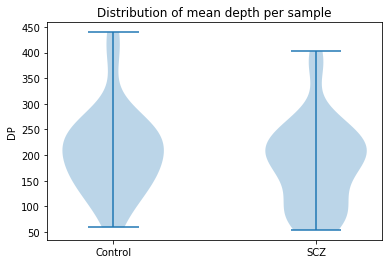

In [8]:
calls2 = calls.copy()
calls2 = individuals.merge_data(calls2, clin[['Dx']])
%matplotlib inline
def plotter(var='DP'):
    s = calls2.groupby(['Dx', 'Individual ID'])[var].mean()
    s = s.dropna()
    fig, ax = plt.subplots()
    vp = ax.violinplot([s.groupby('Dx').get_group(y).values for y in calls2['Dx'].cat.categories])
    ax.set_xticks([1, 2])
    ax.set_xticklabels(['Control', 'SCZ'])
    ax.set_ylabel(var)
    return((fig, ax, s))

fig, ax, df = plotter('DP')
ax.set_title('Distribution of mean depth per sample')

Somatic variants in control samples also tend to have slightly higher allele frequency.

Text(0.5, 1.0, 'Distribution of mean allele frequency per sample')

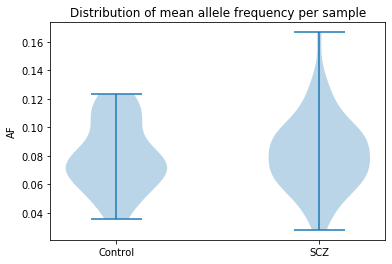

In [9]:
fig, ax, df = plotter('AF')
ax.set_title('Distribution of mean allele frequency per sample')

There seems to be a nonlinear relationship between AF and DP but they are not collinear.  Red means Control and blue SCZ.

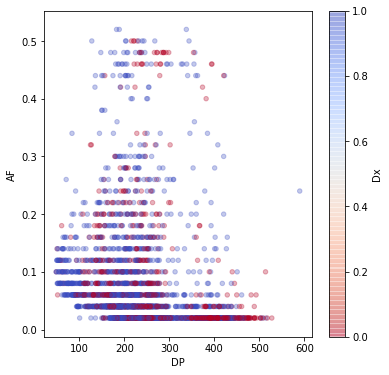

In [10]:
fig, ax = plt.subplots(figsize=(6, 6))
preprocessing.dummify_var(calls2).plot(kind='scatter', x='DP', y='AF', marker='o', alpha=0.3, c='Dx', cmap='coolwarm_r', ax=ax)

## Other

### Chromatin state

Our earlier visual analysis showed slight enrichment of TssA (Active TSS) and TssAFlnk (Flanking Active TSS) in SCZ somatic variants relative to Control ones.  But the variable selection above dropped `chromatinState_DLPFC` suggesting that variable carried little information on `Dx`.

This is possible even if TssA and TssAFlnk are indeed informative for `Dx` because `chromatinState_DLPFC` is a factor of 15 levels and thus adds 14 degrees of freedom to the model.  Below we test this possibility by reducing the number of levels.

In [11]:
calls1['ChromatinState_DLPFC'].cat.categories

Index(['TssA', 'TssAFlnk', 'TxFlnk', 'Tx', 'TxWk', 'EnhG', 'Enh', 'ZNF/Rpts',
       'Het', 'TssBiv', 'BivFlnk', 'EnhBiv', 'ReprPC', 'ReprPCWk', 'Quies'],
      dtype='object')

We first merge the TssAFlnk level into a TssA.  Then we merge all other levels into a single *Other* category.

In [12]:
s = calls1['ChromatinState_DLPFC']
other = s.cat.categories[2:]
s = s.cat.remove_categories(['TssAFlnk']).fillna('TssA')
s = s.cat.remove_categories(other).cat.add_categories('Other').fillna('Other')
s = s.cat.reorder_categories(['Other', 'TssA'], ordered=True)

Now we repeat the variable selection.

In [13]:
calls1['ChromatinState_DLPFC'] = s
best3 = fwsel.forward_selected(calls1.loc[:, :'Dx'], 'Dx')
best3.model.formula

'Dx ~ culprit + DP + ALT + AF + FILTER_PASS + VQSLOD + BaseQRankSum + SOR + REF + ChromatinState_DLPFC + GWASpval + 1'

As the formula shows this time `chromatinState_DLPFC` is selected by the algorithm.  But the following summary shows that the effect of this variable is not significant (see chromatinState_DLPFC[T.Other])

In [14]:
best3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Dx   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     7.083
Date:                Fri, 21 Aug 2020   Prob (F-statistic):           2.09e-22
Time:                        10:55:11   Log-Likelihood:                -1927.7
No. Observations:                3301   AIC:                             3903.
Df Residuals:                    3277   BIC:                             4050.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        0.9911      0.103      9.583      0.000       0.788       1.194
culprit[T.FS]                   -0.3240      0.142     -2.289      0.022      -0.602      -0.046
culprit[T.MQ]                   -0.1208      0.093     -1.297      0.195      -0.303       0.062
culprit[T.MQRankSum]            -0.6017      0.178     -3.378      0.001      -0.951      -0.252
culprit[T.QD]                   -0.3125      0.086     -3.623      0.000      -0.482      -0.143
culprit[T.ReadPosRankSum]       -0.2010      0.104     -1.928      0.054      -0.406       0.003
culprit[T.SOR]                  -0.3089      0.094     -3.302      0.001      -0.492      -0.125
ALT[T.C]                         0.0659      0.030      2.213      0.027       0.007       0.124
ALT[T.G]                         0.0808      0.032      2.558      0.011       0.019       0.143
ALT[T.T]                         0.0122      0.023      0.537      0.591      -0.032       0.057
FILTER_PASS[T.EXT;PASS/PASS]    -0.0191      0.056     -0.341      0.733      -0.129       0.091
FILTER_PASS[T.HC/PASS]          -0.0026      0.056     -0.047      0.962      -0.112       0.106
FILTER_PASS[T.HC;PASS/PASS]     -0.0307      0.052     -0.590      0.555      -0.133       0.071
FILTER_PASS[T.PASS/PASS]         0.0774      0.056      1.372      0.170      -0.033       0.188
REF[T.C]                         0.0090      0.031      0.291      0.771      -0.051       0.069
REF[T.G]                         0.0518      0.032      1.623      0.105      -0.011       0.114
REF[T.T]                         0.0176      0.028      0.630      0.529      -0.037       0.072
ChromatinState_DLPFC[T.TssA]     0.0802      0.050      1.606      0.108      -0.018       0.178
DP                              -0.0391      0.009     -4.193      0.000      -0.057      -0.021
AF                              -0.0379      0.010     -3.713      0.000      -0.058      -0.018
VQSLOD                           0.0257      0.009      2.740      0.006       0.007       0.044
BaseQRankSum                    -0.0203      0.010     -2.034      0.042      -0.040      -0.001
SOR                              0.0182      0.010      1.755      0.079      -0.002       0.039
GWASpval                        -0.0119      0.008     -1.561      0.119      -0.027       0.003
==============================================================================
Omnibus:                      764.929   Durbin-Watson:                   0.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              607.835
Skew:                          -0.955   Prob(JB):                    1.02e-132
Kurtosis:                       2.124   Cond. No.                         54.0
=====================================================================

In [15]:
%connect_info

{
  "shell_port": 51679,
  "iopub_port": 43703,
  "stdin_port": 49807,
  "control_port": 58093,
  "hb_port": 40613,
  "ip": "127.0.0.1",
  "key": "f2c96e47-15d92a9ef1ed6e701e9fc41b",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-6499d66e-0592-42ee-80df-fbd2f9601269.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
